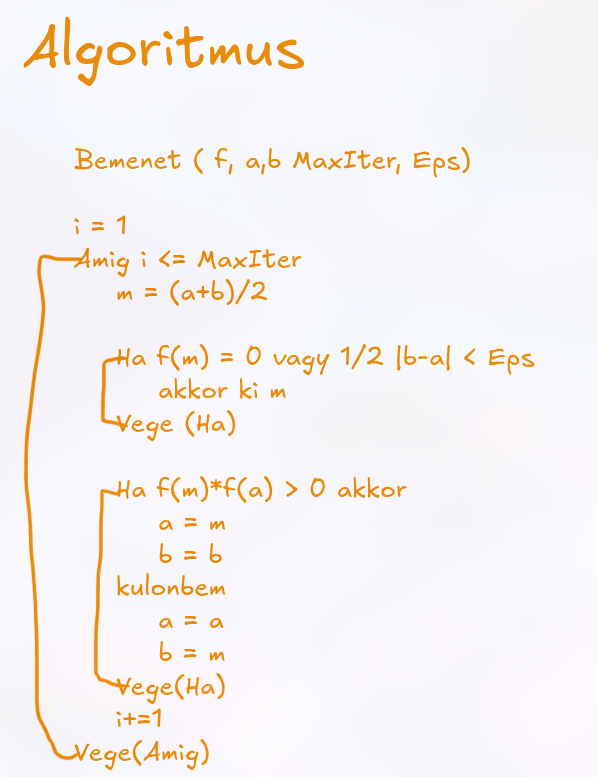

Approximated root: 1.000030517578125
f(root) = -9.155180305242538e-05
Number of iterations: 15


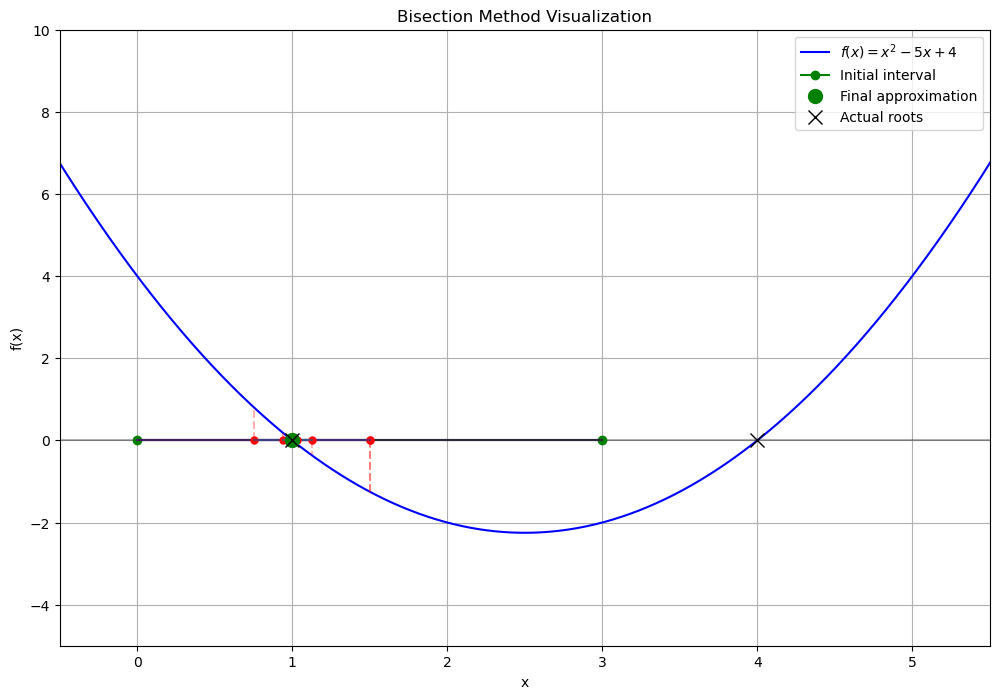

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return x**2 - 5*x + 4

def felezo(a, b, MaxIter, Eps):
    """
    Bisection method with data collection for plotting
    """
    i = 0
    history = []  # To store iterations for plotting
    
    # Initial interval
    history.append((a, b, (a+b)/2))
    
    while(i < MaxIter):
        m = (a+b)/2
        
        if(f(m) == 0) or ((0.5 * abs(b-a)) < Eps):
            return m, history
        
        if f(m)*f(a) > 0:
            a = m
        else:
            b = m
            
        history.append((a, b, m))
        i += 1
    
    return m, history  # Return the last midpoint and history

# Run the algorithm
a, b = 0, 3
root, history = felezo(a, b, 20, 0.0001)
print(f"Approximated root: {root}")
print(f"f(root) = {f(root)}")
print(f"Number of iterations: {len(history)}")

# Create x values for plotting the function
x = np.linspace(-1, 6, 1000)
y = f(x)

# Create the plot
plt.figure(figsize=(12, 8))

# Plot the function
plt.plot(x, y, 'b-', label=r'$f(x) = x^2 - 5x + 4$')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)  # x-axis

# Plot the initial interval
plt.plot([a, b], [0, 0], 'g-o', label='Initial interval')

# Plot the iterations
colors = plt.cm.viridis(np.linspace(0, 1, len(history)))
for i, (ai, bi, mi) in enumerate(history):
    # Plot the current interval
    plt.plot([ai, bi], [0, 0], color=colors[i], alpha=0.7)
    
    # Plot the midpoint
    plt.plot(mi, 0, 'ro', markersize=5)
    
    # Plot vertical line from midpoint to function
    plt.plot([mi, mi], [0, f(mi)], 'r--', alpha=0.3)

# Highlight the final approximation
plt.plot(root, 0, 'go', markersize=10, label='Final approximation')
plt.plot([root, root], [0, f(root)], 'g--', linewidth=2)

# Show the actual roots for reference
roots = [1, 4]  # The exact roots of x^2 - 5x + 4 = 0
plt.plot(roots, [0, 0], 'kx', markersize=10, label='Actual roots')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Bisection Method Visualization')
plt.grid(True)
plt.legend()

# Set axis limits for better visualization
plt.xlim(-0.5, 5.5)
plt.ylim(-5, 10)

plt.show()